In [1]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("amazon_prime_titles.csv")
print(df.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
None


In [3]:
print(df.describe())

       release_year
count   9668.000000
mean    2008.341849
std       18.922482
min     1920.000000
25%     2007.000000
50%     2016.000000
75%     2019.000000
max     2021.000000


In [4]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664    False
9665    False
9666    False
9667    False
Length: 9668, dtype: bool


In [5]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [6]:
print(df.rename(columns={'show_id': 'id'}))

         id     type                    title         director  \
0        s1    Movie      The Grand Seduction     Don McKellar   
1        s2    Movie     Take Care Good Night     Girish Joshi   
2        s3    Movie     Secrets of Deception      Josh Webber   
3        s4    Movie       Pink: Staying True   Sonia Anderson   
4        s5    Movie            Monster Maker     Giles Foster   
...     ...      ...                      ...              ...   
9663  s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664  s9665  TV Show            Planet Patrol              NaN   
9665  s9666    Movie                  Outpost     Steve Barker   
9666  s9667  TV Show  Maradona: Blessed Dream              NaN   
9667  s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar  

In [7]:
## type_counts.index - This provides the labels for the x-axis of the bar chart, which are 'Movie' and 'TV Show' in this case.

## type_counts.values: This provides the height of each bar in the bar chart, representing the number of movies and TV shows.

## Number of Movie VS TV Show

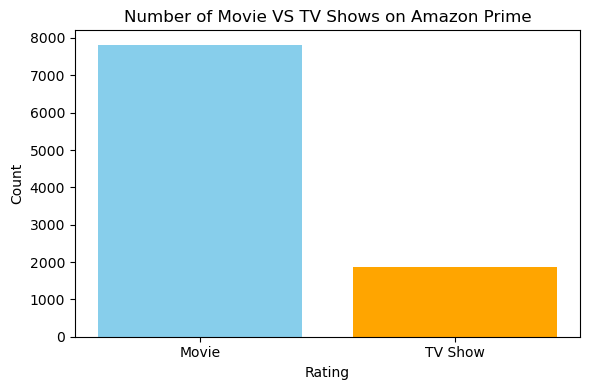

In [8]:
import matplotlib.pyplot as plt

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))

plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movie VS TV Shows on Amazon Prime')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshow.png")
plt.show()

## Rating of Amazon Prime

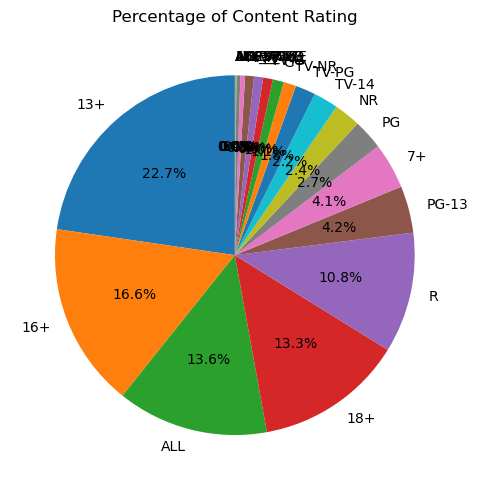

In [15]:
rating_count = df['rating'].value_counts()
plt.figure(figsize=(7,5))

plt.pie(rating_count, labels=rating_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig("rating.png")
plt.show()

## Distribution of Movie Duration

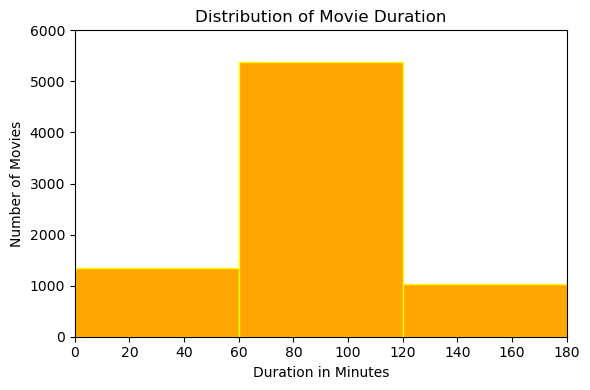

In [11]:
movie = df[df['type'] == 'Movie'].copy()
# Extract integer duration from 'duration' column (e.g., "113 min" -> 113)
movie['duration_int'] = movie['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(6,4))
plt.hist(movie['duration_int'].dropna(), bins=10, color='orange', edgecolor='yellow')

plt.title("Distribution of Movie Duration")
plt.xlabel("Duration in Minutes")
plt.ylabel("Number of Movies")

plt.xlim(0, 180)
plt.ylim(0, 6000)

plt.tight_layout()
plt.savefig("duration_in_minutes.png")
plt.show()

## Release Year VS Number of Shows

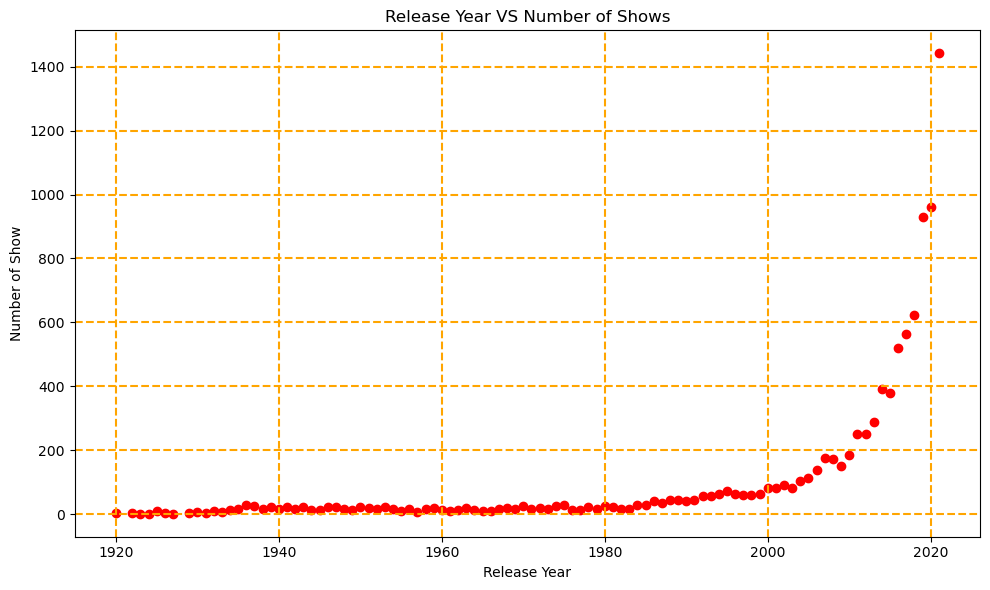

In [ ]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))

plt.scatter(release_counts.index, release_counts.values, color = 'red')

plt.title("Release Year VS Number of Shows")

plt.xlabel("Release Year")
plt.ylabel("Number of Show")

plt.grid(color = "orange", linestyle = "--", linewidth = 1.5)

plt.tight_layout()

plt.savefig("release_year_scatter")

plt.show()

## Top 10 Country by Number of Shows

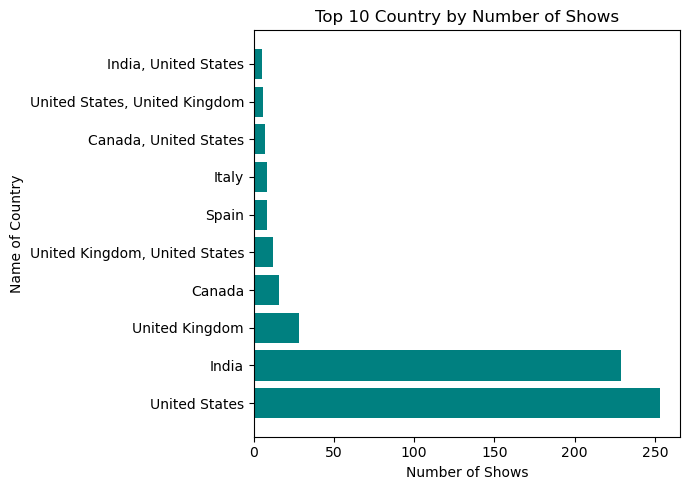

In [16]:
country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(7,5))

plt.barh(country_count.index, country_count.values, color='teal')
plt.title("Top 10 Country by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Name of Country")
plt.tight_layout()
plt.savefig("top_10_country.png")
plt.show()


## Comparison of Movies and TV Shows Released Over Years

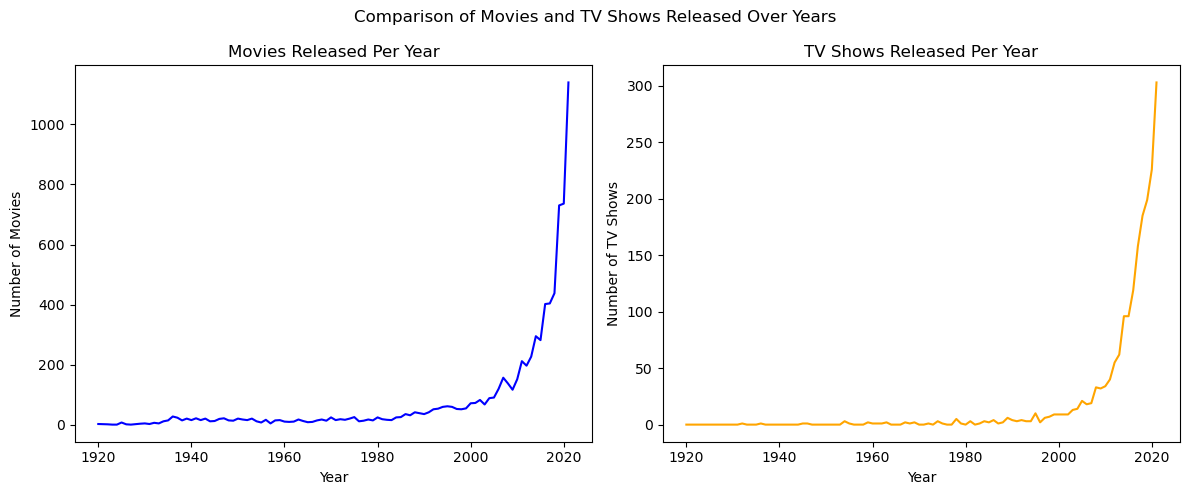

In [ ]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel("Number of Movies")

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel("Number of TV Shows")

fig.suptitle("Comparison of Movies and TV Shows Released Over Years")
plt.tight_layout()
plt.show()